[View in Colaboratory](https://colab.research.google.com/github/rajagopalmotivate/FullyConvNetwork/blob/master/Copy_of_Copy_of_Untitled5.ipynb)

In [1]:
from keras import  layers
from keras import models
from keras.datasets import mnist
from keras import  utils
import matplotlib.pyplot as plt

model = models.Sequential()
#layer1c = layers.Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1) )
layer1c = layers.Conv2D(32, (5,5), activation='relu'  , input_shape=(None,None,1))

layer1m = layers.MaxPooling2D(pool_size=(2,2), strides=2)
#layer2c = layers.Conv2D(64, (3,3), activation='relu')
#layer2m = layers.MaxPooling2D(2,2)

model.add(layer1c)
model.add(layer1m)
#model.add(layer2c)
#model.add(layer2m)

layerFlatten = layers.Flatten()
layerd1 = layers.Dense(64, activation='relu')
layerd2 = layers.Dense(10, activation='softmax' )

layerd1FULLYCON =  layers.Conv2D(64, (12,12), activation='relu' )
layerd2FULLYCON =  layers.Conv2D(10, (1,1), activation='softmax' )


#layerd1 = layers.Conv2D(64, (3,3), activation='relu')
#layerd2 = layers.Dense(10, activation='softmax' )

Archi='FULLYCONNECTED'

if(Archi=='FULLYCONNECTED'):
    model.add( layerd1FULLYCON )
    model.add( layerd2FULLYCON )
else:
    model.add( layerFlatten )
    model.add( layerd1 )
    model.add( layerd2 )

print(model.summary())

(trainX, trainY), (testX, testY) = mnist.load_data()

print("No of Training samples = " + str(len(trainX)) )
print("No of Test samples = " + str(len(testX)) )

trainSetSize = len(trainX)
testSetSize = len(testX)

trainX = trainX[0:trainSetSize]
trainY = trainY[0:trainSetSize]

testX = testX[0:testSetSize]
testY = testY[0:testSetSize]


trainX = trainX.astype('float') * 1 /255
testX = testX.astype('float') * 1 /255

print( "Shape of trainX = " + str(trainX.shape) )


trainXready = trainX.reshape((trainSetSize, 28, 28, 1))
testXready = testX.reshape((testSetSize, 28, 28, 1))

print( "Shape of trainXready = " + str(trainXready.shape) )


trainYready = utils.to_categorical(trainY)
testYready = utils.to_categorical(testY)

trainYreadyTENSOR = trainYready.reshape(60000, 1, 1, 10)
testYreadyTENSOR = testYready.reshape(10000, 1, 1, 10)


print(' a sample from trainY:' + str(trainY[0]))
print(' a sample from trainYready:' + str(trainYready[0]))
print(' shape of  trainX[o]:' + str((trainX[0]).shape))
print(' shape of  trainYreadyTENSOR[o]:' + str((trainYreadyTENSOR[0]).shape))

print(' a sample from trainYreadyTENSOR:' + str(trainYreadyTENSOR[0]))

print(' a sample from trainX:' + str(trainX[0]))



print( "Shape of trainY = " + str(trainY.shape) )

print( "Shape of trainYready = " + str(trainYready.shape) )
print( "Shape of trainYreadyTENSOR = " + str(trainYreadyTENSOR.shape) )


model.compile( optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'] )

# batchsize 32, epoch 20, Test Accracy 
# batchsize 64, epoch 5 , Test Accuracy 99.16%

model.fit(trainXready, trainYreadyTENSOR, batch_size=32, epochs=2)

testLoss, testAccuracy = model.evaluate(testXready, testYreadyTENSOR)

print("Test Accuracy : " + str(testAccuracy) )




Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, None, 32)    832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    294976    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 10)    650       
Total params: 296,458
Trainable params: 296,458
Non-trainable params: 0
_________________________________________________________________
None
11493376/11490434 [==============================] - 0s 0us/step
No of Training samples = 60000
No of Test samples = 10000
Shape of trainX = (60000, 28, 28)
Shape of trainXready = (60000, 28, 28, 1)
 a sample from trainY:5
 a sample from trainYready:[0. 0. 0. 0. 

shape of oneimage = (28, 28, 1)
shape of oneimagePredictformat = (1, 28, 28, 1)
shape of ans = (1, 1, 1, 10)
shape of ans2 = (1, 1, 1, 10)
ans = [1.3072110e-08 1.0855219e-08 1.2826897e-05 9.9997270e-01 2.3446313e-08
 2.0315413e-06 1.0153135e-05 3.0761985e-08 1.3698449e-06 7.5385987e-07]


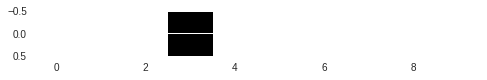

ans = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
ansargmax = 3


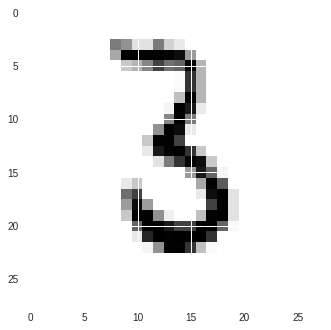

In [2]:
randomimage = 531


oneimage = testXready[randomimage]
oneimagePredictformat = oneimage.reshape(1, 28, 28, 1)


print('shape of oneimage = ' + str(oneimage.shape))
print('shape of oneimagePredictformat = ' + str(oneimagePredictformat.shape))


ans = model.predict(testXready[randomimage:randomimage+1])

print('shape of ans = ' + str(ans.shape))

ans2 = model.predict(oneimagePredictformat)

print('shape of ans2 = ' + str(ans2.shape))


ansargmax = ans.argmax()

ans = ans[0][0][0]

print('ans = ' + str(ans))

ans = ans.round(2)

ansplot = ans.reshape(1,10)

plt.imshow(ansplot)
plt.show()

print('ans = ' + str(ans))


print('ansargmax = ' + str(ansargmax))




sampleimage1Dvector = testXready[randomimage]
sampleimage1Dvector = sampleimage1Dvector.copy()
sampleimage = sampleimage1Dvector.reshape(28,28)
plt.imshow(sampleimage)
plt.show()



shape of asampleimage = (28, 28, 1)
shape of NandriJesusans = (1, 7, 7, 10)
shape of ansargmax = (1, 7, 7)
 ansargmax = 
[[[9 9 7 7 7 7 7]
  [9 9 7 7 7 7 7]
  [0 2 2 0 7 7 4]
  [7 1 1 1 7 4 4]
  [7 7 1 1 4 4 6]
  [7 3 3 0 4 4 4]
  [2 2 3 1 4 4 4]]]
 matched = 
[[[ True  True False False False False False]
  [ True  True False False False False False]
  [False False False False False False False]
  [False False False False False False False]
  [False False False False False False False]
  [False False False False False False False]
  [False False False False False False False]]]


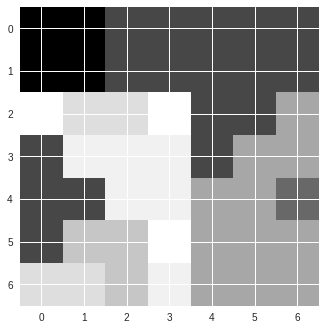

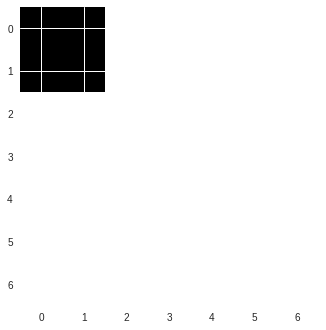

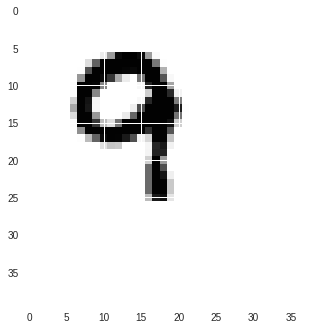

In [3]:
import numpy as np

asampleimage= testXready[99]
print('shape of asampleimage = ' + str(asampleimage.shape))

asampleimageBIG = np.zeros((40, 40, 1))
asampleimageBIG[0:28, 0:28] = asampleimage


asampleimageBIG = asampleimageBIG.reshape(1, 40, 40, 1)

NandriJesusans = model.predict(asampleimageBIG)
NandriJesusans = NandriJesusans.round()

print('shape of NandriJesusans = ' + str(NandriJesusans.shape))


ansargmax = NandriJesusans.argmax(axis=3)
print('shape of ansargmax = ' + str(ansargmax.shape))

print(' ansargmax = ' )
print(ansargmax)

matched = ansargmax == 9


print(' matched = ' )
print(matched)

reultmap = ansargmax.reshape(7,7)
plt.imshow(reultmap)
plt.show()

reultmap2 = matched.reshape(7,7)
plt.imshow(reultmap2)
plt.show()


asampleimageBIGshow = asampleimageBIG.reshape(40,40)
plt.imshow(asampleimageBIGshow)
plt.show()

shape of asampleimage = (28, 28, 1)
shape of NandriJesusans = (1, 47, 47, 10)
shape of ansargmax = (1, 47, 47)
 ansargmax = 
[[[9 9 4 ... 0 0 0]
  [9 9 4 ... 0 0 0]
  [0 7 1 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


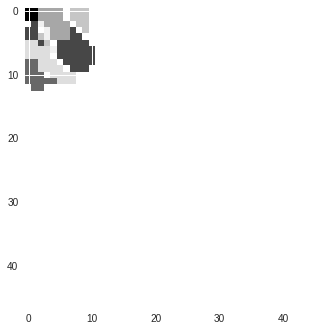

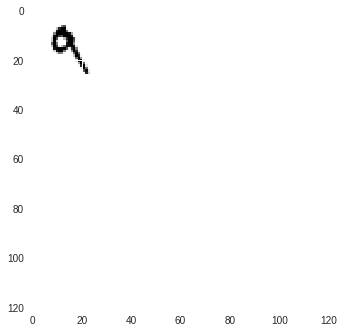

In [4]:

asampleimage= testXready[7]
print('shape of asampleimage = ' + str(asampleimage.shape))

asampleimageBIG = np.zeros((121, 121, 1))
asampleimageBIG[0:28, 0:28] = asampleimage


asampleimageBIG = asampleimageBIG.reshape(1, 121, 121, 1)

NandriJesusans = model.predict(asampleimageBIG)
NandriJesusans = NandriJesusans.round()

print('shape of NandriJesusans = ' + str(NandriJesusans.shape))


ansargmax = NandriJesusans.argmax(axis=3)

print('shape of ansargmax = ' + str(ansargmax.shape))



print(' ansargmax = ' )
print(ansargmax)



reultmap = ansargmax.reshape(47,47)
plt.imshow(reultmap)
plt.show()

asampleimageBIGshow = asampleimageBIG.reshape(121,121)
plt.imshow(asampleimageBIGshow)
plt.show()

shape of asampleimage = (28, 28, 1)
shape of NandriJesusans = (1, 47, 47, 10)
shape of ansargmax = (1, 47, 47)
 ansargmax = 
[[[9 9 4 ... 0 0 0]
  [9 9 4 ... 0 0 0]
  [0 7 1 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


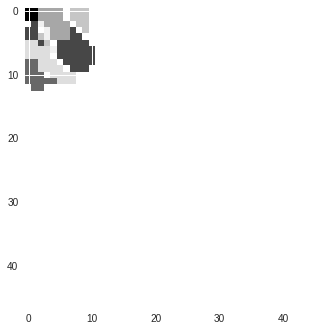

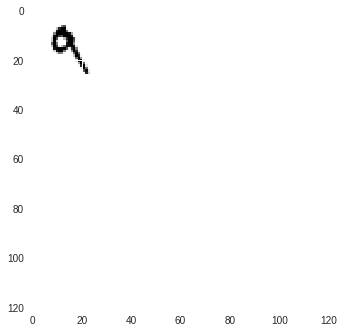

In [5]:

asampleimage= testXready[7]
print('shape of asampleimage = ' + str(asampleimage.shape))

asampleimageBIG = np.zeros((121, 121, 1))
asampleimageBIG[0:28, 0:28] = asampleimage


asampleimageBIG = asampleimageBIG.reshape(1, 121, 121, 1)

NandriJesusans = model.predict(asampleimageBIG)
NandriJesusans = NandriJesusans.round()

print('shape of NandriJesusans = ' + str(NandriJesusans.shape))


ansargmax = NandriJesusans.argmax(axis=3)
print('shape of ansargmax = ' + str(ansargmax.shape))

print(' ansargmax = ' )
print(ansargmax)



reultmap = ansargmax.reshape(47,47)
plt.imshow(reultmap)
plt.show()

asampleimageBIGshow = asampleimageBIG.reshape(121,121)
plt.imshow(asampleimageBIGshow)
plt.show()